In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Merging all the data in 1 single file

In [62]:
df = pd.read_csv('/Users/tusharbhatt/Desktop/Python_Data_Project/Sales Analysis/Sales_Data/Sales_April_2019.csv')

all_months_data = pd.DataFrame()
files = [file for file in os.listdir('/Users/tusharbhatt/Desktop/Python_Data_Project/Sales Analysis/Sales_Data')]

for file in files:
    df = pd.read_csv('/Users/tusharbhatt/Desktop/Python_Data_Project/Sales Analysis/Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data, df])

# all_months_data.to_csv('All_months_data.csv')
df_new = all_months_data
all_months_data.sort_index(ascending=False).head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
25116,319670,Bose SoundSport Headphones,1,99.99,12/21/19 21:45,"747 Chestnut St, Los Angeles, CA 90001"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25111,319665,iPhone,1,700,12/15/19 11:13,"377 1st St, Atlanta, GA 30301"
25110,319664,ThinkPad Laptop,1,999.99,12/30/19 01:06,"767 2nd St, San Francisco, CA 94016"
25109,319663,Flatscreen TV,1,300,12/07/19 08:25,"334 12th St, Atlanta, GA 30301"
25108,319662,Bose SoundSport Headphones,1,99.99,12/31/19 19:07,"939 8th St, San Francisco, CA 94016"
25107,319661,AAA Batteries (4-pack),1,2.99,12/11/19 21:24,"691 West St, Portland, ME 04101"


In [63]:
df_new = df_new[
    df_new['Order Date'].notna() &
    (df_new['Order Date'].str.strip() != 'Order Date')
]


Q1. What was the best month for sales? How much was earned that month?

In [64]:

# Convert Order Date to datetime
df_new['Order Date'] = pd.to_datetime(
    df_new['Order Date']
)

# Drop rows where date conversion failed
df_new = df_new.dropna(how='all')

# Add Month columns
df_new['Month'] = df_new['Order Date'].dt.month
df_new['Month Name'] = df_new['Order Date'].dt.strftime('%B')


/var/folders/ct/0gqd6f810gb86n15wl6cctk00000gn/T/ipykernel_79288/2164695351.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_new['Order Date'] = pd.to_datetime(
/var/folders/ct/0gqd6f810gb86n15wl6cctk00000gn/T/ipykernel_79288/2164695351.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Order Date'] = pd.to_datetime(


In [65]:

df_new['Quantity Ordered'] = df_new['Quantity Ordered'].astype(int)
df_new['Price Each'] = df_new['Price Each'].astype(float)
df_new['Total_Sales'] = df_new['Quantity Ordered'] * df_new['Price Each']

In [66]:
monthly_results = df_new.groupby('Month')['Total_Sales'].sum().reset_index()

monthly_results

,Month,Total_Sales
0,1,1822256.73
1,2,2202022.42
2,3,2807100.38
3,4,3390670.24
4,5,3152606.75
5,6,2577802.26
6,7,2647775.76
7,8,2244467.88
8,9,2097560.13
9,10,3736726.88


Ans: December

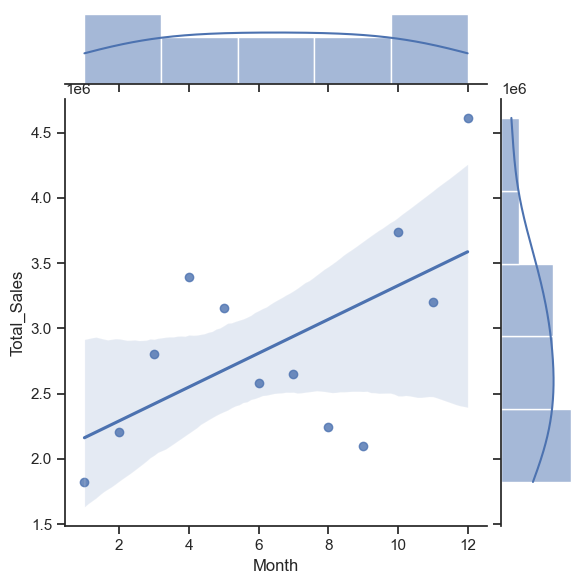

In [67]:
sns.set_theme(style= 'ticks')
sns.jointplot(data = monthly_results, x = 'Month', y= 'Total_Sales', kind = 'reg')

/var/folders/ct/0gqd6f810gb86n15wl6cctk00000gn/T/ipykernel_79288/1037965693.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = monthly_results, x = 'Month', y = 'Total_Sales', palette = 'YlGnBu')


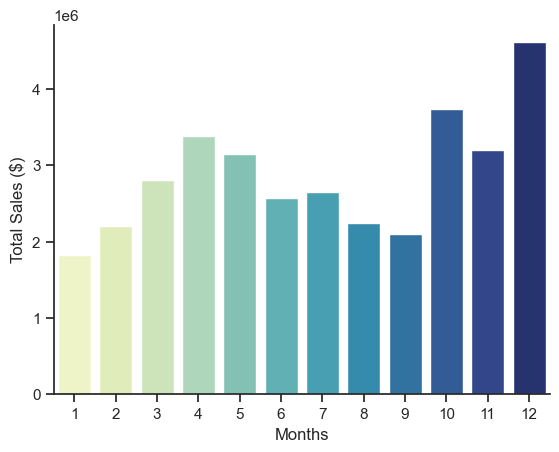

In [68]:


sns.set_theme(style= 'ticks')
sns.barplot(data = monthly_results, x = 'Month', y = 'Total_Sales', palette = 'YlGnBu')

plt.xlabel("Months")     
plt.ylabel("Total Sales ($)") 

sns.despine()

Q2. which city had the max number of sales??

In [69]:
df_new[['Street', 'City', 'State']] = df_new['Purchase Address'].str.split(',', n=2, expand=True)


In [70]:
df_new = df_new.drop(columns=['Street', 'State'])


In [71]:
df_new.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name,Total_Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,December,1700.00,New York City
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,December,600.00,New York City
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,December,11.95,New York City
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,December,149.99,San Francisco
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,December,11.95,Atlanta


In [72]:
City_sales = df_new.groupby('City')['Total_Sales'].sum().reset_index()

City_sales

,City,Total_Sales
0,Atlanta,2795498.58
1,Austin,1819581.75
2,Boston,3661642.01
3,Dallas,2767975.40
4,Los Angeles,5452570.80
5,New York City,4664317.43
6,Portland,2320490.61
7,San Francisco,8262203.91
8,Seattle,2747755.48


/var/folders/ct/0gqd6f810gb86n15wl6cctk00000gn/T/ipykernel_79288/1200484147.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


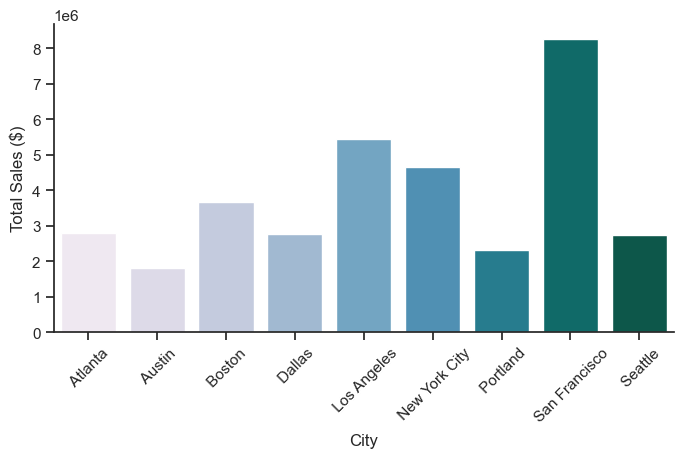

In [73]:
plt.figure(figsize=(8,4))      # set figure size

sns.set_theme(style='ticks')
sns.barplot(
    data = City_sales,
    x = 'City',
    y = 'Total_Sales',
    palette = 'PuBuGn'
)

plt.xlabel("City")              
plt.ylabel("Total Sales ($)")

plt.xticks(rotation=45)         
sns.despine()

plt.show()


Q3. What time should we display advertisements to maximise the likelyhood of customer's buying product?


In [74]:
df_new['Order Date'] = pd.to_datetime(df_new['Order Date'])

In [75]:
df_new['Hour'] = df_new['Order Date'].dt.hour
df_new['Min']  = df_new['Order Date'].dt.minute


In [76]:
df_new_group = df_new.groupby('Hour').sum(numeric_only=True)
df_new_group = df_new_group.reset_index()
df_new_group

,Hour,Quantity Ordered,Price Each,Month,Total_Sales,Min
0,0,4428,709296.70,27554,713721.27,103596
1,1,2619,458490.00,16657,460866.88,61807
2,2,1398,233833.64,8507,234851.44,32508
3,3,928,144726.42,5904,145757.89,23044
4,4,937,162058.18,6148,162661.01,26876
5,5,1493,229621.21,9301,230679.82,42877
6,6,2810,445000.11,17539,448113.00,80343
7,7,4556,740568.11,28850,744854.12,127447
8,8,7002,1185970.62,43626,1192348.97,198135
9,9,9816,1628498.49,60981,1639030.58,268253


In [77]:
hours = [hour for hour, df_new in df_new.groupby('Hour')]

type(hours)

list

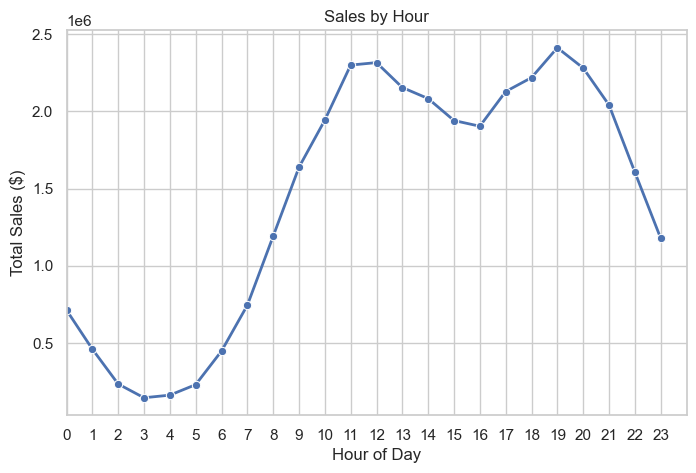

In [78]:
plt.figure(figsize=(8,5))
sns.set_theme(style="whitegrid")

sns.lineplot(
    data = df_new_group,
    x='Hour',
    y= df_new_group["Total_Sales"],
    marker="o",
    linewidth = 2
)
plt.xticks(hours)
plt.title("Sales by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Total Sales ($)")
plt.xlim(0,24)
plt.show()


Q4. What product were often sold together?

In [79]:
df_new["Grouped"]= df_new.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df_grouped = df_new[['Order ID', 'Grouped']].drop_duplicates()

In [80]:
df_new

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name,Total_Sales,City,Hour,Min,Grouped
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,December,1700.00,New York City,0,1,Macbook Pro Laptop
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,December,600.00,New York City,7,3,LG Washing Machine
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,December,11.95,New York City,18,21,USB-C Charging Cable
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,December,149.99,San Francisco,15,13,27in FHD Monitor
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,December,11.95,Atlanta,12,38,USB-C Charging Cable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,June,2.99,Boston,19,2,AAA Batteries (4-pack)
13618,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,June,149.99,New York City,19,29,27in FHD Monitor
13619,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,June,11.95,San Francisco,18,57,USB-C Charging Cable
13620,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,June,11.95,San Francisco,18,35,USB-C Charging Cable


In [81]:
df_grouped

,Order ID,Grouped
0,295665,Macbook Pro Laptop
1,295666,LG Washing Machine
2,295667,USB-C Charging Cable
3,295668,27in FHD Monitor
4,295669,USB-C Charging Cable
...,...,...
13617,222905,AAA Batteries (4-pack)
13618,222906,27in FHD Monitor
13619,222907,USB-C Charging Cable
13620,222908,USB-C Charging Cable


In [82]:
print("df_grouped shape:", df_grouped.shape)
print(df_grouped.head())


df_grouped shape: (178437, 2)
  Order ID               Grouped
0   295665    Macbook Pro Laptop
1   295666    LG Washing Machine
2   295667  USB-C Charging Cable
3   295668      27in FHD Monitor
4   295669  USB-C Charging Cable


In [83]:
from itertools import combinations
from collections import Counter


In [84]:

count = Counter()

for row in df_grouped['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in (count.most_common(10)):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


Q5. what product sold the most?

In [85]:
df_product_sold = df_new.groupby('Product')
df_product_sold = df_product_sold.sum(numeric_only=True)
df_product_sold

,Quantity Ordered,Price Each,Month,Total_Sales,Hour,Min
Product,,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764,122252
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815,142789


In [86]:
df_product_sold = df_product_sold.sort_values(by = 'Quantity Ordered', ascending=False).reset_index()
df_product_sold

,Product,Quantity Ordered,Price Each,Month,Total_Sales,Hour,Min
0,AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113
1,AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039
2,USB-C Charging Cable,23975,261740.85,154819,286501.25,314645,647586
3,Lightning Charging Cable,23217,323787.10,153092,347094.15,312529,634442
4,Wired Headphones,20557,226395.18,133397,246478.43,271720,554023
5,Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570
6,Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603
7,27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
8,iPhone,6849,4789400.00,47941,4794300.00,98657,201688
9,27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331


In [95]:
prices = df_new.groupby('Product').mean(numeric_only=True)
prices['Price Each']


Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

/var/folders/ct/0gqd6f810gb86n15wl6cctk00000gn/T/ipykernel_79288/907085113.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_product_sold, x = 'Quantity Ordered', y = 'Product', palette = 'YlGnBu')


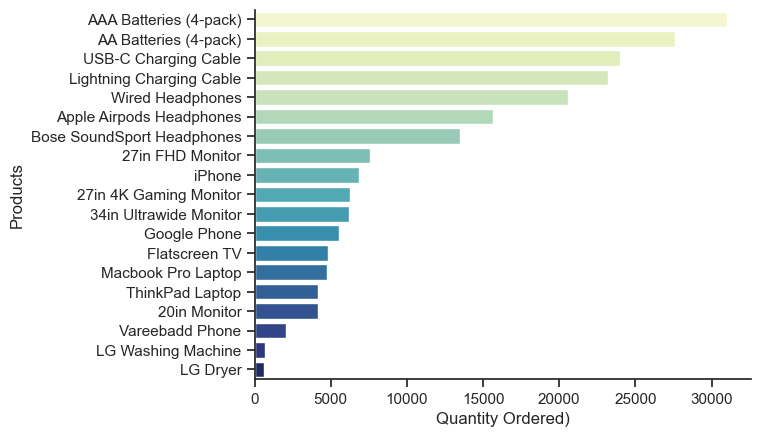

In [88]:


sns.set_theme(style= 'ticks')
sns.barplot(data = df_product_sold, x = 'Quantity Ordered', y = 'Product', palette = 'YlGnBu')

plt.ylabel("Products")     
plt.xlabel("Quantity Ordered)") 

sns.despine()

/var/folders/ct/0gqd6f810gb86n15wl6cctk00000gn/T/ipykernel_79288/1505077065.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation='vertical', size=9)


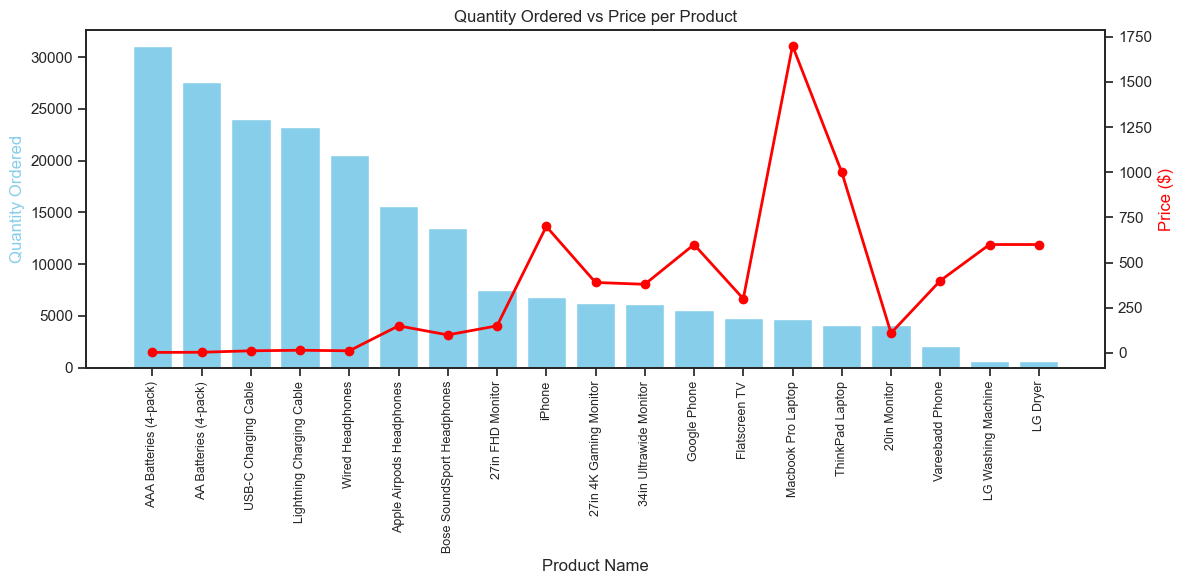

In [94]:
products = df_product_sold['Product']
quantity_ordered = df_product_sold['Quantity Ordered']

prices = df_new.groupby('Product')['Price Each'].mean()
price_list = prices.loc[products]   

fig, ax1 = plt.subplots(figsize=(12,6))
ax2 = ax1.twinx()



ax1.bar(products, quantity_ordered, color='skyblue', label="Quantity Ordered")


ax2.plot(products, price_list, color='red', marker='o', linewidth=2, label="Price")


ax1.set_xlabel("Product Name")
ax1.set_ylabel("Quantity Ordered", color='skyblue')
ax2.set_ylabel("Price ($)", color='red')


ax1.set_xticklabels(products, rotation='vertical', size=9)

plt.title("Quantity Ordered vs Price per Product")
plt.tight_layout()
plt.show()
